In [83]:
# Visualization of happiness index vs. increase in population
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/TimoLischke/sql-database/refs/heads/main/happiness_increase_population.csv"
df = pd.read_csv(url)
df

,country name,ladder score,Increase
0,Yemen,4.0,62.53740
1,Mali,4.0,55.24000
2,Jordan,4.0,53.93958
3,Chad,4.0,53.65149
4,Gabon,5.0,48.36445
...,...,...,...
130,United Kingdom,7.0,0.00000
131,United States,7.0,0.00000
132,North Macedonia,5.0,0.00000
133,Myanmar,4.0,0.00000


In [85]:
print(df["country name"][0:20])

0            Yemen
1             Mali
2           Jordan
3             Chad
4            Gabon
5            Niger
6           Gambia
7           Zambia
8           Kuwait
9            Egypt
10    Sierra Leone
11        Ethiopia
12           Benin
13     Afghanistan
14            Togo
15        Pakistan
16      Madagascar
17    Burkina Faso
18        Tanzania
19            Iraq
Name: country name, dtype: object


In [87]:
# Create a new DF with the top 20 countries regarding population increase
selected_columns = ["country name", "ladder score", "Increase"]
df_top_20 = df.loc[:19, ["country name", "ladder score", "Increase"]]
df_top_20

,country name,ladder score,Increase
0,Yemen,4.0,62.53740
1,Mali,4.0,55.24000
2,Jordan,4.0,53.93958
3,Chad,4.0,53.65149
4,Gabon,5.0,48.36445
5,Niger,5.0,45.84678
6,Gambia,4.0,44.58117
7,Zambia,4.0,41.90103
8,Kuwait,7.0,41.82181
9,Egypt,4.0,39.75634


In [89]:
# Is there null values in the Increase column ?
df.isna().any()

country name    False
ladder score    False
Increase        False
dtype: bool

In [91]:
# Check for number of null values of increase column
df["Increase"].tail(10)

125   -12.31934
126   -12.35783
127   -15.75629
128   -17.26894
129   -28.85565
130     0.00000
131     0.00000
132     0.00000
133     0.00000
134     0.00000
Name: Increase, dtype: float64

In [93]:
# Remove last 5 rows from dataframe because they contain null values
df_no_null = df.iloc[:-5] 
df_no_null

,country name,ladder score,Increase
0,Yemen,4.0,62.53740
1,Mali,4.0,55.24000
2,Jordan,4.0,53.93958
3,Chad,4.0,53.65149
4,Gabon,5.0,48.36445
...,...,...,...
125,Moldova,6.0,-12.31934
126,Albania,5.0,-12.35783
127,Ukraine,5.0,-15.75629
128,Bosnia and Herzegovina,6.0,-17.26894


In [95]:
df_lowest_20 = df_no_null.loc[110:130, ["country name", "ladder score", "Increase"]]
df_lowest_20

,country name,ladder score,Increase
110,Armenia,5.0,-0.34015
111,El Salvador,6.0,-0.71367
112,Uruguay,7.0,-0.93913
113,Portugal,6.0,-1.74370
114,Japan,6.0,-2.55651
115,Hungary,6.0,-2.58767
116,Italy,6.0,-2.82848
117,Lithuania,7.0,-4.95887
118,Bulgaria,5.0,-5.72418
119,Venezuela,6.0,-7.92769


In [121]:
# Replace Bosnia and Herzegovina for Bosnia
df_lowest_20["country name"] =  df_lowest_20["country name"].replace("Bosnia and Herzegovina", "Bosnia")
df_lowest_20

,country name,ladder score,Increase
110,Armenia,5.0,-0.34015
111,El Salvador,6.0,-0.71367
112,Uruguay,7.0,-0.93913
113,Portugal,6.0,-1.74370
114,Japan,6.0,-2.55651
115,Hungary,6.0,-2.58767
116,Italy,6.0,-2.82848
117,Lithuania,7.0,-4.95887
118,Bulgaria,5.0,-5.72418
119,Venezuela,6.0,-7.92769


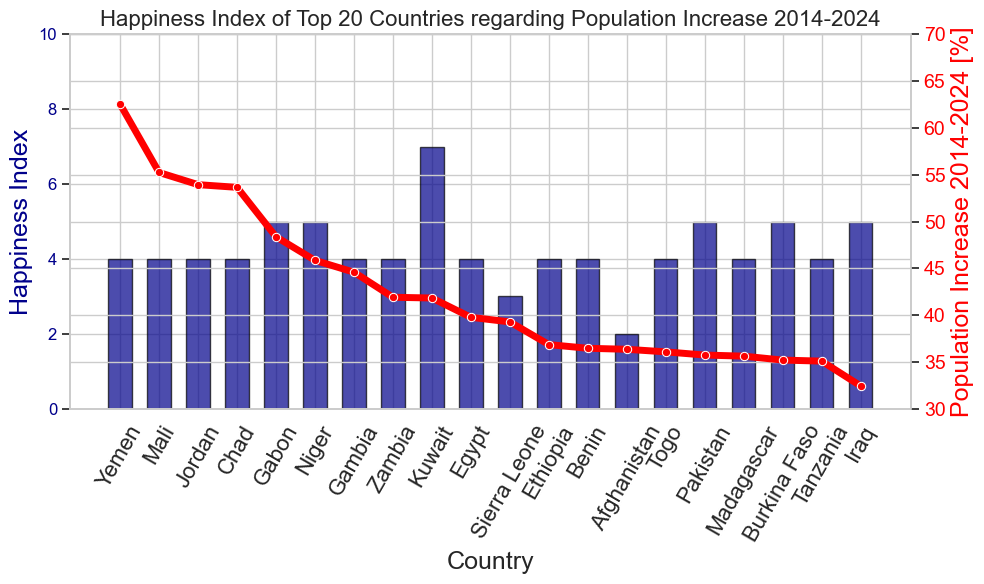

In [127]:
# Create a plot of the top 20 countries
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bar chart for the ladder score
bar_width = 0.6  # The width of the bars; lower values result in larger gaps
ax1.bar(df_top_20['country name'], df_top_20['ladder score'], color='darkblue', alpha=0.7, edgecolor='black', width=bar_width)

# Set labels for the first y-axis
ax1.set_ylabel("Happiness Index", fontsize=18, color='darkblue')
ax1.set_xlabel("Country", fontsize=18)
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=14) # Set font size for y-axis values

# Adjust the font size of the x-axis and y-axis tick labels
plt.xticks(rotation=60, fontsize=16)  # Set font size for x-axis values
plt.yticks(fontsize=12)  # Set font size for y-axis values

# Set the range of y-axis
plt.ylim(0, 10)     # y-axis range: 0 to 10

# Create a second y-axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(x='country name', y='Increase', data=df_top_20, ax=ax2, marker='o', color='red', linewidth=5)

# Set labels for the second y-axis
ax2.set_ylabel("Population Increase 2014-2024 [%]", fontsize=18, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=14) # Set font size for y-axis values

# Set the range of y-axis
plt.ylim(30, 70)     # y-axis range: 30 to 70

# Add a title
plt.title("Happiness Index of Top 20 Countries regarding Population Increase 2014-2024", fontsize=16)

# Safe the plot (needs to be done first, before showing it!)
# plt.savefig("top_20_countries_population_increase.png", dpi=300)
####  ONLY RUN ONCE !!!! ####

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

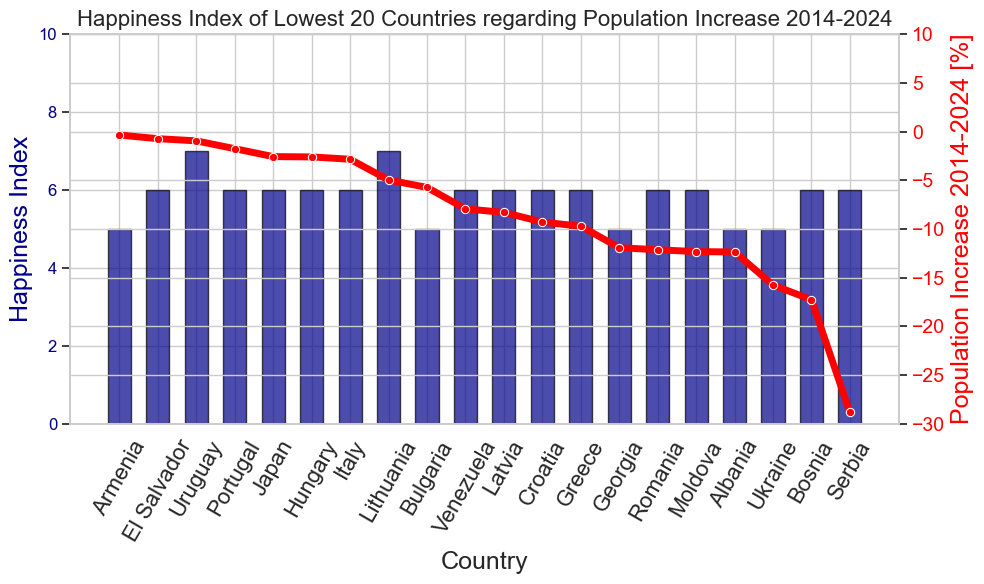

In [129]:
# Create a plot of the lowest 20 countries
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bar chart for the ladder score
bar_width = 0.6  # The width of the bars; lower values result in larger gaps
ax1.bar(df_lowest_20['country name'], df_lowest_20['ladder score'], color='darkblue', alpha=0.7, edgecolor='black', width=bar_width)

# Set labels for the first y-axis
ax1.set_ylabel("Happiness Index", fontsize=18, color='darkblue')
ax1.set_xlabel("Country", fontsize=18)
ax1.tick_params(axis='y', labelcolor='darkblue', labelsize=14) # Set font size for y-axis values

# Adjust the font size of the x-axis and y-axis tick labels
plt.xticks(rotation=60, fontsize=16)  # Set font size for x-axis values
plt.yticks(fontsize=12)  # Set font size for y-axis values

# Set the range of y-axis
plt.ylim(0, 10)     # y-axis range: 0 to 10

# Create a second y-axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(x='country name', y='Increase', data=df_lowest_20, ax=ax2, marker='o', color='red', linewidth=5)

# Set labels for the second y-axis
ax2.set_ylabel("Population Increase 2014-2024 [%]", fontsize=18, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=14) # Set font size for y-axis values

# Set the range of y-axis
plt.ylim(-30, 10)     # y-axis range: -30 to 10

# Add a title
plt.title("Happiness Index of Lowest 20 Countries regarding Population Increase 2014-2024", fontsize=16)

# Safe the plot (needs to be done first, before showing it!)
# plt.savefig("lowest_20_countries_population_increase.png", dpi=300)
####  ONLY RUN ONCE !!!! ####

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()